In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import math

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost_framework import *

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [2]:
path = "../data/mysql_dataset/complete_dataset"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0", axis=1)
df['date'] =  pd.to_datetime(df['date'])
df['day'] = df.date.dt.dayofweek.astype(str).astype("category").astype(int)
df["month"] = df.date.dt.month.astype(str).astype("category").astype(int)
players = list(df['player_name_x'].unique())
#df = df.loc[df['player_name_x'] == players[11]]
df


,player_name_x,daily_load,fatigue,mood,readiness,sleep_duration,sleep_quality,soreness,stress,injury_ts,weekly_load,Team_name,Duration,Total_distance,Average_running_speed,Top_speed,Metabolic_power,HIR,date,day,month
0,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,720.0,3.0,4.0,7.0,8.0,3.0,3.0,3.0,0.0,3840,TeamA,01:56:02,6.418480,0.941018,6.455561,90.597913,4.000000,2020-06-01,0,6
1,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,800.0,3.0,3.0,6.0,8.0,3.0,3.0,3.0,0.0,4010,TeamA,02:14:20,7.065781,0.892786,6.319450,81.143770,3.000000,2020-06-02,1,6
2,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,900.0,2.0,4.0,6.0,7.0,3.0,3.0,4.0,0.0,4140,TeamA,02:01:52,8.261348,1.164821,7.080561,499.303475,19.000000,2020-06-03,2,6
3,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,200.0,3.0,3.0,6.0,7.0,3.0,3.0,3.0,0.0,3800,TeamA,01:30:21,1.895167,0.227098,3.311114,17.595405,17.101304,2020-06-04,3,6
4,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,720.0,3.0,3.0,6.0,7.0,2.0,3.0,3.0,0.0,3620,TeamA,02:07:07,5.423633,0.768622,6.577783,792.560972,9.000000,2020-06-05,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17824,TeamB-f67673c0-d467-4832-9519-55133a2647e5,560.0,3.0,2.0,6.0,9.0,3.0,4.0,2.0,0.0,2370,TeamB,0,4.424341,0.641948,5.603560,78.915140,0.559518,2021-11-07,6,11
17825,TeamB-f67673c0-d467-4832-9519-55133a2647e5,200.0,4.0,3.0,8.0,8.0,4.0,4.0,3.0,0.0,2150,TeamB,0,4.517046,0.673586,5.279919,81.832396,7.373916,2021-11-08,0,11
17826,TeamB-f67673c0-d467-4832-9519-55133a2647e5,400.0,4.0,4.0,8.0,9.0,4.0,4.0,4.0,0.0,2550,TeamB,01:26:01,3.646940,0.591366,5.833338,50.257041,4.050596,2021-11-09,1,11
17827,TeamB-f67673c0-d467-4832-9519-55133a2647e5,420.0,4.0,4.0,8.0,8.0,4.0,4.0,4.0,0.0,2420,TeamB,01:28:59,4.113280,0.729622,5.191671,72.677431,2.792490,2021-11-10,2,11


In [5]:
results = smf.ols('readiness ~ fatigue + daily_load + injury_ts + mood + sleep_quality + soreness + stress + sleep_duration + Total_distance + Average_running_speed + Top_speed + HIR + month + day', data=df.loc[df['Team_name'] == "TeamB"]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              readiness   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     222.7
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        09:32:30   Log-Likelihood:                -9616.9
No. Observations:                7086   AIC:                         1.926e+04
Df Residuals:                    7071   BIC:                         1.937e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.87

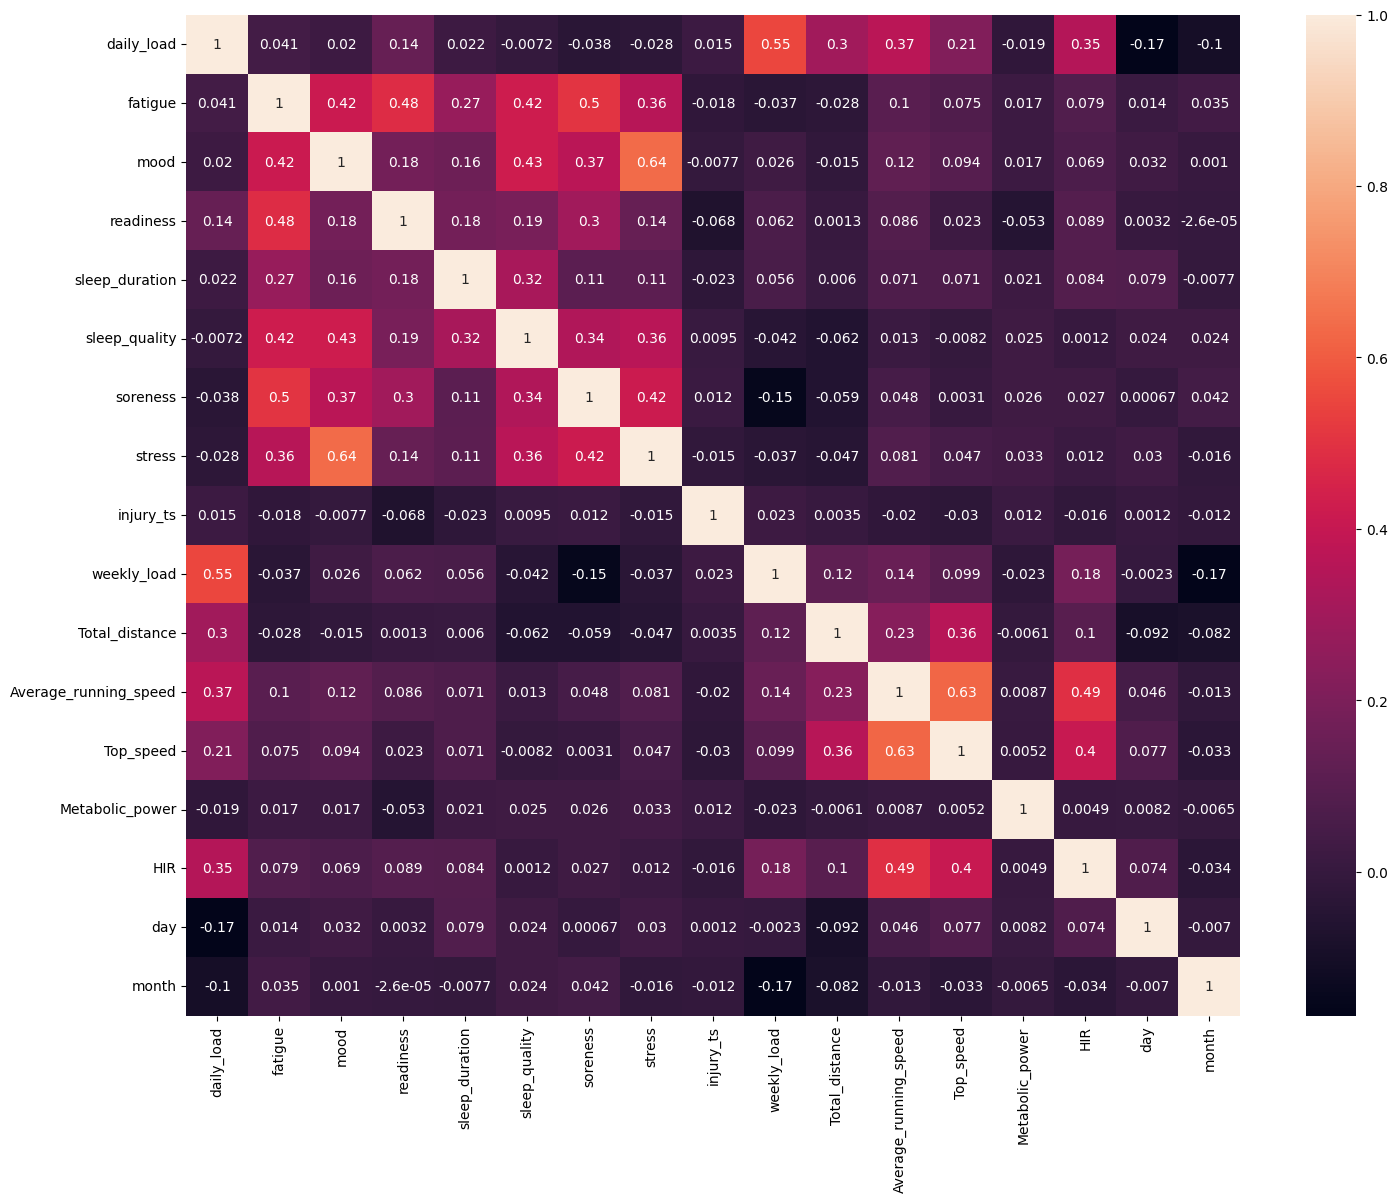

In [4]:
f = plt.figure(figsize=(17, 13))
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [6]:
df.describe()

,daily_load,fatigue,mood,readiness,sleep_duration,sleep_quality,soreness,stress,injury_ts,weekly_load,Total_distance,Average_running_speed,Top_speed,Metabolic_power,HIR,day,month
count,17829.000000,17829.000000,17829.000000,17829.000000,17829.000000,17829.000000,17829.000000,17829.000000,17829.000000,17829.000000,17829.000000,17829.000000,17829.000000,17829.000000,17829.000000,17829.000000,17829.000000
mean,287.212968,3.024567,3.340232,6.833530,7.965954,3.275618,2.805261,3.202591,0.003197,2011.505973,4.316765,0.863421,6.591488,156.822865,5.484829,2.992372,7.000393
std,320.711070,0.565798,0.566933,1.276896,0.921423,0.654698,0.687718,0.579753,0.056453,1222.308383,1.456877,0.245163,0.774624,207.811451,5.983691,2.001079,3.120468
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000397,0.000020,0.336111,-312.243036,0.001693,0.000000,1.000000
25%,0.000000,3.000000,3.000000,6.000000,8.000000,3.000000,2.000000,3.000000,0.000000,1170.000000,3.545819,0.754185,6.341672,88.375263,1.829252,1.000000,5.000000
50%,200.000000,3.000000,3.000000,7.000000,8.000000,3.000000,3.000000,3.000000,0.000000,2190.000000,4.177030,0.844896,6.664749,124.328417,4.000000,3.000000,7.000000
75%,540.000000,3.000000,4.000000,8.000000,8.000000,4.000000,3.000000,4.000000,0.000000,2880.000000,4.886911,0.950882,6.969925,172.789554,6.172514,5.000000,10.000000
max,2430.000000,5.000000,5.000000,10.000000,12.000000,5.000000,5.000000,5.000000,1.000000,5670.000000,9.989458,6.759362,9.500000,5904.674501,100.000000,6.000000,12.000000


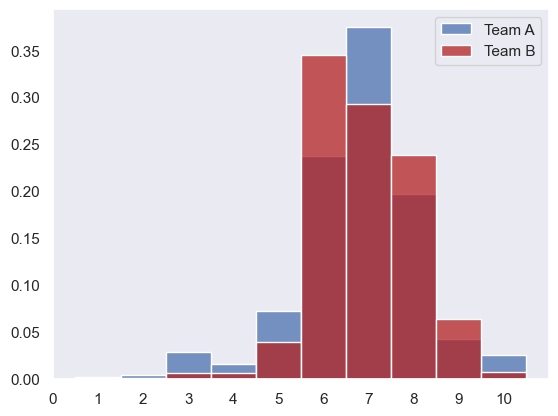

In [6]:
sns.set_theme()
sns.set_style("dark")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
sns.set_palette("deep")

df = to_sessions(df)

df_A = df.loc[df['Team_name'] == "TeamA"]
df_B = df.loc[df['Team_name'] == "TeamB"]

histPlot = sns.histplot(data=df_A, x="readiness", discrete=True, stat='probability', color="b", label="Team A")
histPlot = sns.histplot(data=df_B, x="readiness", discrete=True, stat='probability', color="firebrick", label="Team B")
histPlot.set(xlabel=None)
histPlot.set(ylabel=None)
histPlot.set_xticks(range(11))
#histPlot.set_title('Distributions of readiness for Team A and Team B')
histPlot.legend()

[Text(0, 0.5, '')]

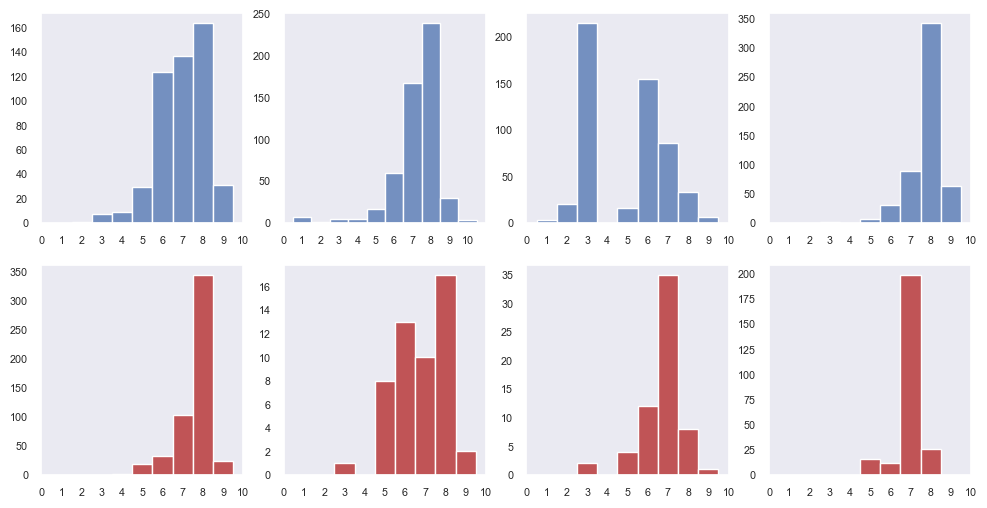

In [7]:
players_A = list(df_A['player_name_x'].unique())
players_B = list(df_B['player_name_x'].unique())
sns.set_context("notebook", font_scale=0.7, rc={"lines.linewidth": 1})

fig,axs = plt.subplots(2,4, figsize = (12,6))

#fig.suptitle('Distribution of readiness for 4 random players from both Team A and Team B', fontsize=16)

histplot1 = sns.histplot(data=df.loc[df['player_name_x'] == players_A[0]], discrete=True, x="readiness", color="b", ax=axs[0, 0])
histplot2 = sns.histplot(data=df.loc[df['player_name_x'] == players_A[4]], discrete=True, x="readiness", color="b", ax=axs[0, 1])
histplot3 = sns.histplot(data=df.loc[df['player_name_x'] == players_A[6]], discrete=True, x="readiness", color="b", ax=axs[0, 2])
histplot4 = sns.histplot(data=df.loc[df['player_name_x'] == players_A[8]], discrete=True, x="readiness", color="b", ax=axs[0, 3])

histplot9 = sns.histplot(data=df.loc[df['player_name_x'] == players_B[0]], discrete=True, x="readiness", color="firebrick", ax=axs[1, 0])
histplot10 = sns.histplot(data=df.loc[df['player_name_x'] == players_B[19]], discrete=True, x="readiness", color="firebrick", ax=axs[1, 1])
histplot11 = sns.histplot(data=df.loc[df['player_name_x'] == players_B[18]], discrete=True, x="readiness", color="firebrick", ax=axs[1, 2])
histplot12 = sns.histplot(data=df.loc[df['player_name_x'] == players_B[13]], discrete=True, x="readiness", color="firebrick", ax=axs[1, 3])

histplot1.set_xticks(range(11))
histplot1.set(xlabel=None)
histplot1.set(ylabel=None)

histplot2.set_xticks(range(11))
histplot2.set(xlabel=None)
histplot2.set(ylabel=None)


histplot3.set_xticks(range(11))
histplot3.set(xlabel=None)
histplot3.set(ylabel=None)

histplot4.set_xticks(range(11))
histplot4.set(xlabel=None)
histplot4.set(ylabel=None)

histplot9.set_xticks(range(11))
histplot9.set(xlabel=None)
histplot9.set(ylabel=None)

histplot10.set_xticks(range(11))
histplot10.set(xlabel=None)
histplot10.set(ylabel=None)

histplot11.set_xticks(range(11))
histplot11.set(xlabel=None)
histplot11.set(ylabel=None)

histplot12.set_xticks(range(11))
histplot12.set(xlabel=None)
histplot12.set(ylabel=None)



In [8]:
print(df_A["injury_ts"].value_counts())
print(df_B["injury_ts"].value_counts())
print(df["injury_ts"].value_counts())

0.0    10687
1.0       56
Name: injury_ts, dtype: int64
0.0    7085
1.0       1
Name: injury_ts, dtype: int64
0.0    17772
1.0       57
Name: injury_ts, dtype: int64


In [9]:
df_outliers = df.loc[df['readiness'] <= 4]
df_outliers_injury = df_outliers.loc[df_outliers['injury_ts'] == 1]
df_outliers_injury

,player_name_x,daily_load,fatigue,mood,readiness,sleep_duration,sleep_quality,soreness,stress,injury_ts,weekly_load,Team_name,Duration,Total_distance,Average_running_speed,Top_speed,Metabolic_power,HIR,date,day,month
1048,TeamA-3e5f6e2b-46b7-4890-84a9-3bbb2649af5a,0.0,2.0,3.0,1.0,2.0,2.0,4.0,2.0,1.0,2170,TeamA,0,4.165696,0.757797,6.402508,112.417154,1.045113,2020-06-13,5,6
1049,TeamA-3e5f6e2b-46b7-4890-84a9-3bbb2649af5a,0.0,3.0,3.0,2.0,7.0,3.0,4.0,3.0,1.0,2170,TeamA,0,4.165696,0.757797,6.402508,112.417154,1.045113,2020-06-14,6,6
1104,TeamA-3e5f6e2b-46b7-4890-84a9-3bbb2649af5a,0.0,1.0,3.0,2.0,6.0,2.0,3.0,3.0,1.0,1040,TeamA,0,4.165696,0.757797,6.402508,112.417154,1.045113,2020-08-08,5,8
1107,TeamA-3e5f6e2b-46b7-4890-84a9-3bbb2649af5a,0.0,2.0,3.0,2.0,9.0,4.0,3.0,3.0,1.0,480,TeamA,0,4.165696,0.757797,6.402508,112.417154,1.045113,2020-08-11,1,8
1303,TeamA-3e5f6e2b-46b7-4890-84a9-3bbb2649af5a,490.0,3.0,3.0,4.0,7.0,3.0,2.0,3.0,1.0,3040,TeamA,0,4.325401,0.793690,6.407400,190.892834,2.139855,2021-02-23,1,2
1576,TeamA-4051bba7-1170-4c43-b912-8c38815a7625,0.0,2.0,3.0,4.0,7.0,2.0,2.0,3.0,1.0,3460,TeamA,0,2.721134,0.538805,4.964865,231.207108,0.784982,2020-06-07,6,6
1591,TeamA-4051bba7-1170-4c43-b912-8c38815a7625,1020.0,2.0,3.0,4.0,7.0,2.0,2.0,2.0,1.0,2990,TeamA,01:48:00,3.608327,0.543860,5.997227,21.939117,2.641044,2020-06-22,0,6
1616,TeamA-4051bba7-1170-4c43-b912-8c38815a7625,280.0,3.0,4.0,4.0,8.0,4.0,2.0,4.0,1.0,3040,TeamA,0,3.236795,0.575476,5.086076,181.437475,1.375912,2020-07-17,4,7
1730,TeamA-4051bba7-1170-4c43-b912-8c38815a7625,90.0,2.0,3.0,4.0,7.0,2.0,2.0,3.0,1.0,3300,TeamA,0,2.886882,0.550592,5.003826,215.209726,0.974924,2020-11-08,6,11
2966,TeamA-74afe68c-f348-414c-9754-6d6f9df12587,0.0,3.0,3.0,1.0,10.0,4.0,3.0,3.0,1.0,0,TeamA,0,3.883520,0.779062,6.432685,582.635575,4.219401,2021-03-25,3,3


<AxesSubplot:>

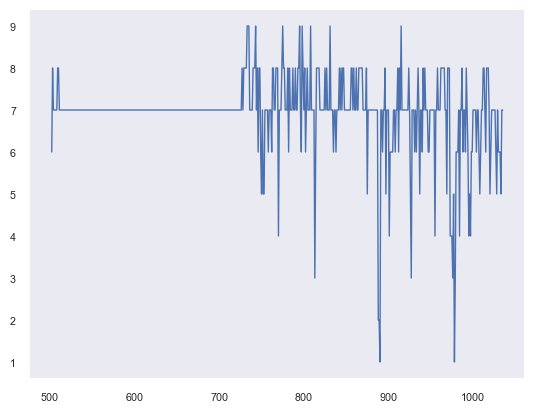

In [10]:
df_A.loc[df_A['player_name_x'] == players_A[1]]["readiness"].plot()

In [11]:
columnNames = ["daily_load", "fatigue", "mood", "readiness", "sleep_duration", "sleep_quality", "soreness", "injury_ts", "stress", "Total_distance", "Average_running_speed", "Top_speed", "HIR"]
df_scaled = df_A[columnNames]
df_low = df_scaled.loc[df_scaled['readiness'] <5]
df_high = df_scaled.loc[df_scaled['readiness'] >7]
df_scalar = MinMaxScaler()
#df_scaled[["daily_load"]] = df_scalar.fit_transform(df_scaled[["daily_load"]])*10
df_scaled = pd.DataFrame(df_scalar.fit_transform(df_scaled), columns=columnNames)
df_low = pd.DataFrame(df_scalar.transform(df_low), columns=columnNames)
df_high = pd.DataFrame(df_scalar.transform(df_high), columns=columnNames)
df_high

,daily_load,fatigue,mood,readiness,sleep_duration,sleep_quality,soreness,injury_ts,stress,Total_distance,Average_running_speed,Top_speed,HIR
0,0.098765,0.5,0.50,0.777778,0.454545,0.75,0.5,0.0,0.50,0.300284,0.097760,0.632010,0.018103
1,0.333333,0.5,0.50,0.777778,0.545455,0.50,0.5,0.0,0.50,0.113116,0.194639,0.766293,0.308310
2,0.288066,0.5,0.50,0.777778,0.545455,0.50,0.5,0.0,0.50,0.105089,0.182027,0.712944,0.235758
3,0.238683,0.5,0.75,0.777778,0.545455,0.50,0.5,0.0,0.75,0.380808,0.087852,0.732647,0.072517
4,0.329218,0.5,0.75,0.777778,0.545455,0.50,0.5,0.0,0.75,0.859055,0.175004,0.765384,0.235758
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,0.296296,0.5,0.50,0.777778,0.636364,0.25,0.5,0.0,0.50,0.137111,0.236540,0.822977,0.562242
2842,0.000000,0.5,0.50,0.777778,0.636364,0.50,0.5,0.0,0.50,0.284700,0.131333,0.578358,0.088932
2843,0.000000,0.5,0.50,0.777778,0.636364,0.50,0.5,0.0,0.50,0.692808,0.161580,0.725978,0.145068
2844,0.000000,0.5,0.50,0.777778,0.727273,0.75,0.5,0.0,0.50,0.370727,0.132325,0.754472,0.072517


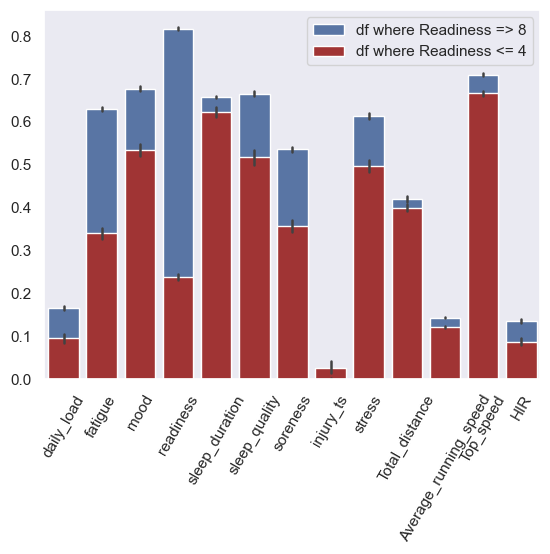

In [12]:
#df_low.mean().plot(kind='bar')

sns.set_theme()
sns.set_style("dark")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
sns.set_palette("deep")

histPlot = sns.barplot(data=df_high, color="b", label="df where Readiness => 8")
histPlot = sns.barplot(data=df_low, color="firebrick", label="df where Readiness <= 4")
histPlot.set(xlabel=None)
histPlot.set(ylabel=None)
plt.xticks(rotation=60)
#histPlot.set_xticks(range(13))
#histPlot.set_title('Distributions of readiness for Team A and Team B')
histPlot.legend()

In [13]:
df_high.loc[df_high['injury_ts'] ==1].count()

daily_load               5
fatigue                  5
mood                     5
readiness                5
sleep_duration           5
sleep_quality            5
soreness                 5
injury_ts                5
stress                   5
Total_distance           5
Average_running_speed    5
Top_speed                5
HIR                      5
dtype: int64

In [14]:
df_low.loc[df_low['injury_ts'] ==1].count()

daily_load               15
fatigue                  15
mood                     15
readiness                15
sleep_duration           15
sleep_quality            15
soreness                 15
injury_ts                15
stress                   15
Total_distance           15
Average_running_speed    15
Top_speed                15
HIR                      15
dtype: int64

In [15]:
df.loc[df['injury_ts'] == 1].count()

player_name_x            57
daily_load               57
fatigue                  57
mood                     57
readiness                57
sleep_duration           57
sleep_quality            57
soreness                 57
stress                   57
injury_ts                57
weekly_load              57
Team_name                57
Duration                 57
Total_distance           57
Average_running_speed    57
Top_speed                57
Metabolic_power          57
HIR                      57
date                     57
day                      57
month                    57
dtype: int64

In [16]:
from statsmodels.tsa.stattools import adfuller

test_p_value = []

for i in range(len(players_A)):
    data = df.loc[df['player_name_x'] == players_A[i]]["readiness"]

    #perform augmented Dickey-Fuller test
    test_p_value.append(adfuller(data, 10)[1])

test_p_value = [ '%.2f' % elem for elem in test_p_value]
test_p_value

['0.03',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.24',
 '0.59',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.01',
 '0.00',
 '0.60',
 '0.00',
 '0.00']

<AxesSubplot:>

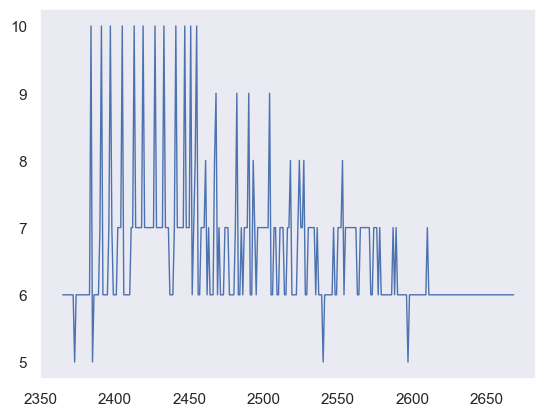

In [17]:
df.loc[df['player_name_x'] == players_A[5]]["readiness"].plot()

In [18]:
test_p_value = []

for i in range(len(players_A)):
    data = df.loc[df['player_name_x'] == players_A[i]]["readiness"]

    #perform augmented Dickey-Fuller test
    test_p_value.append(adfuller(data, 12)[1])

test_p_value = [ '%.2f' % elem for elem in test_p_value]
test_p_value

['0.03',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.24',
 '0.59',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.01',
 '0.00',
 '0.60',
 '0.00',
 '0.00']